In [2]:
import utils.heisenberg_no_k as heis
import utils.heisenberg_w_k as heisk
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
from importlib import reload
from matplotlib.colors import LogNorm

In [92]:
reload(heis)

<module 'utils.heisenberg_no_k' from 'c:\\Users\\Kotsios2\\Documents\\GitHub\\ED\\utils\\heisenberg_no_k.py'>

In [28]:
heis.basisVisualizer(10,2**8)

|↓|↑|↓|↓|↓|↓|↓|↓|↓|↓|


In [29]:
print(heis.binp(2**10-1))
print(bin(2**10-1))

1111111111
0b1111111111


L = 9 basis size: 512
L = 10 basis size: 1024


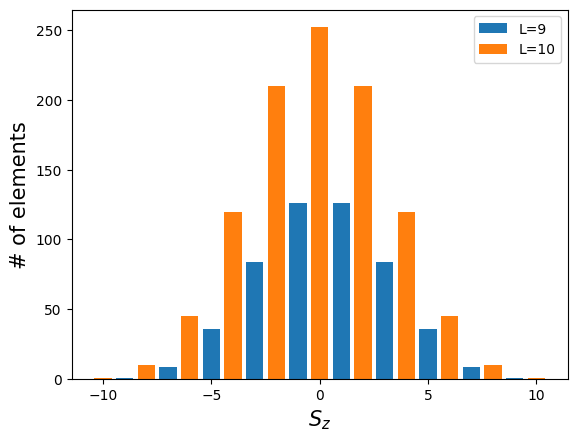

In [25]:
for L in [9,10]:
    basisSzList = heis.makeSzBasis(L)
    SziVals  = []
    sizeVals = []
    for i in range(len(basisSzList)):
        SziVals.append(-L+2*i)
        sizeVals.append(len(basisSzList[i]))
    plt.bar(SziVals,sizeVals,label="L="+str(L))
    
plt.xlabel(r"$S_z$",fontsize=15)
plt.ylabel("# of elements",fontsize=15)
plt.legend()
plt.show()

In [31]:
int(4/2)

2

In [33]:
(11+1)%12

0

In [41]:
heis.flip(29,1,2)

27

In [37]:
heis.binp(29)

'11101'

In [42]:
heis.binp(27)

'11011'

In [62]:
H = heis.constructH(12)
plt.imshow(H)
plt.colorbar()

True


NameError: name 'e' is not defined

In [208]:
reload(heis)

<module 'utils.heisenberg_no_k' from 'c:\\Users\\Kotsios2\\Documents\\GitHub\\ED\\utils\\heisenberg_no_k.py'>

In [220]:
-6.263549533547039/14

-0.4473963952533599

In [ ]:
%%time
heis.generatePlots(L=16)

True
diagonalizing mz sector -8.0
True
diagonalizing mz sector -7.0
True
diagonalizing mz sector -6.0
True
diagonalizing mz sector -5.0
True
diagonalizing mz sector -4.0
True
diagonalizing mz sector -3.0
True
diagonalizing mz sector -2.0
True
diagonalizing mz sector -1.0
True
diagonalizing mz sector 0.0


In [212]:
def cyclic_left_shift(s, bit_width):
    msb = (s >> (bit_width - 1)) & 1
    s_shifted = ((s << 1) | msb) & ((1 << bit_width) - 1)
    return s_shifted


In [219]:
cyclic_left_shift(204,8)

153

In [214]:
heis.basisVisualizer(10,26)

|↓|↓|↓|↓|↓|↑|↑|↓|↑|↓|


In [215]:
heis.basisVisualizer(10,52)

|↓|↓|↓|↓|↑|↑|↓|↑|↓|↓|


with k

In [3]:
reload(heisk)

<module 'utils.heisenberg_w_k' from 'c:\\Users\\Kotsios2\\Documents\\GitHub\\ED\\utils\\heisenberg_w_k.py'>

In [62]:
a,b,c = heisk.makeBasis(28,0,0)
print(a)

1432860


In [121]:
L = 22
size = np.zeros((int(L/2)+1,L),dtype=float)
for i,mz in enumerate(np.arange(0,L/2+1,+1)):
    for j,k in enumerate(np.arange(-L/2+1,L/2+1,+1)):
        size[i,j] = heisk.makeBasis(L,k,mz)[0]

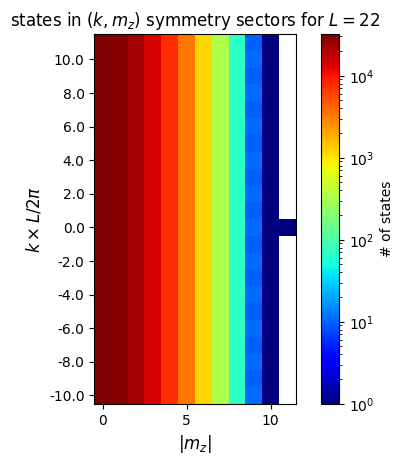

In [ ]:
im = plt.imshow(size.T,origin='lower', norm=LogNorm(), cmap='jet')
plt.colorbar(im, label="# of states")
plt.ylabel('$k \\times L/2\pi$',fontsize=12)
plt.xlabel(r'$|m_z|$',fontsize=12)
plt.yticks(np.arange(0,L,+2),np.arange(-L/2+1,L/2+1,+2));
plt.title('states in $(k,m_z)$ symmetry sectors for $L=$'+str(L))
#plt.savefig('basis_size.png',dpi=500)

In [51]:
heisk.basisVisualizer(6,56)

|↑|↑|↑|↓|↓|↓|


In [52]:
heisk.Tran(6,56)

49

In [53]:
heisk.findrepstate(6,49)

2

In [17]:
reload(heisk)

<module 'utils.heisenberg_w_k' from 'c:\\Users\\Kotsios2\\Documents\\GitHub\\ED\\utils\\heisenberg_w_k.py'>

In [69]:
from scipy.sparse import csr_matrix,isspmatrix_csr #optimizes H . v operations. to check if H already row sparse, do  isspmatrix_csr(H)
from scipy.sparse.linalg import eigsh

In [80]:
H = heisk.constructH(20,k=0,mz=0,pars={'J':1.})

True


In [88]:
eigenvalues, eigenvectors = eigsh(H, k=2, which='SA', tol=1e-10)
print(eigenvalues/10)

[-0.89043865 -0.80725105]


In [87]:
eigenvalues, eigenvectors = eigsh(csr_matrix(H), k=2, which='SA', tol=1e-10)
print(eigenvalues)

[-8.90438653 -8.07251051]


True
False
True
False
True
True


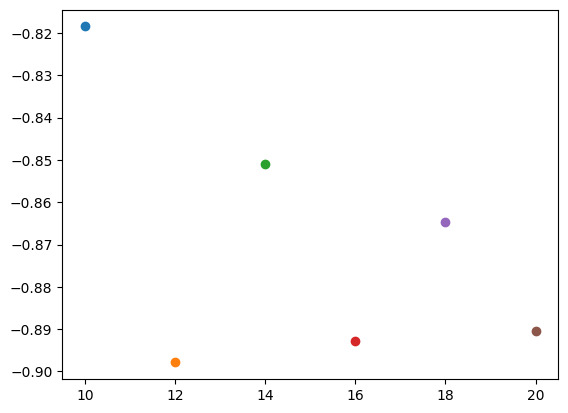

In [89]:
for l in range(10,22,+2):
    H = heisk.constructH(l,k=0,mz=0,pars={'J':1.})
    eigenvalues, eigenvectors = eigsh(csr_matrix(H), k=2, which='SA', tol=1e-10)
    plt.scatter(l,eigenvalues[0]/(l/2))


In [84]:
eigenvalues/20 * 2

array([-0.89043865, -0.80725105])

In [73]:
isspmatrix_csr(csr_matrix(H))

True

In [58]:
print(np.max(np.abs(H-H.T)))

2.220446049250313e-16


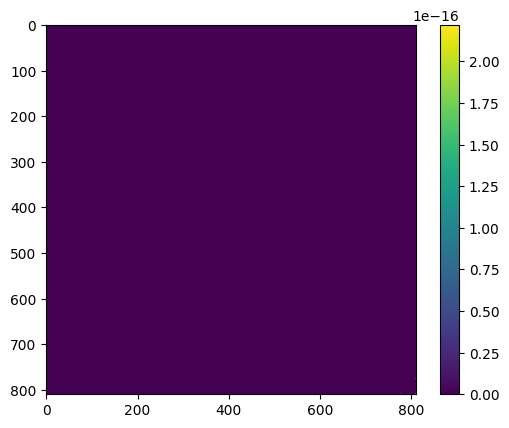

In [59]:
plt.imshow(np.abs(H-H.T))
plt.colorbar()